- KEYWORDS: review




# Reminder on how to get Python help

Use the help function.



In [1]:
from scipy.optimize import fsolve

help(fsolve)

Help on function fsolve in module scipy.optimize.minpack:

fsolve(func, x0, args=(), fprime=None, full_output=0, col_deriv=0, xtol=1.49012e-08, maxfev=0, band=None, epsfcn=None, factor=100, diag=None)
    Find the roots of a function.

Return the roots of the (non-linear) equations defined by
``func(x) = 0`` given a starting estimate.

Parameters
-----
func : callable ``f(x, *args)``
    A function that takes at least one (possibly vector) argument.
x0 : ndarray
    The starting estimate for the roots of ``func(x) = 0``.
args : tuple, optional
    Any extra arguments to `func`.
fprime : callable(x), optional
    A function to compute the Jacobian of `func` with derivatives
    across the rows. By default, the Jacobian will be estimated.
full_output : bool, optional
    If True, return optional outputs.
col_deriv : bool, optional
    Specify whether the Jacobian function computes derivatives down
    the columns (faster, because there is no transpose operation).
xtol : float, optional
 


# A Mathematics Review


## Solving algebraic equations

Solve the equation $x^2 = 3$ for $x$.

This is an algebraic equation that is nonlinear in $x$. So, we use fsolve. To do that we need to define a function that will be equal to zero at the solution. We get that with this equation:

$0 = 3 - x^2$



In [1]:
def objective(x):
    return 3 - x**2

We need to provide a guess for fsolve. An easy way to get a guess is to graph the function.



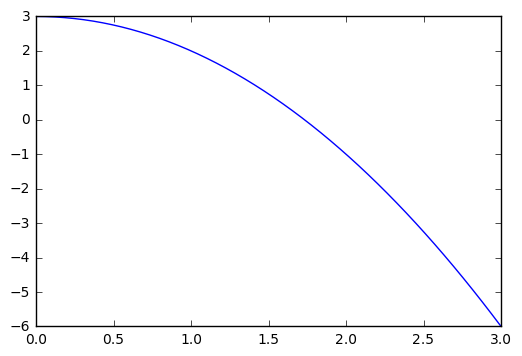

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.linspace(0, 3)
Y = objective(X)

plt.plot(X, Y)

You should see in this graph that the objective function passes through zero around 1.7. We use that to make a guess in fsolve.



In [1]:
from scipy.optimize import fsolve

ans, = fsolve(objective, 1.7)
print(ans)

1.73205080757


# Solving an integral

Evaluate the integral: $\int_0^\pi sin(x) dx$. This is a definite integral so we use quad.



In [1]:
from scipy.integrate import quad

def integrand(x):
    return np.sin(x)

ans, err = quad(integrand, 0, np.pi)

print(ans)

2.0


# Differential equations

Solve the differential equation $\frac{dy}{dx} = \frac{1}{x + 0.1}$ from $x=0$ to $x=1$ if $y(x=0) = 1$ and plot your solution.

This problem states a differential equation in standard form: $y'(x) = f(x, y)$. We are given an initial condition, and a range to find the function $y(x)$ over. For this problem, we use odeint. We have to:

1.  define a function for the right hand side of the ODE
2.  Define an array for the range we solve/integrate over



In [1]:
def ode(y, x):
    return 1 / (x + 0.1)

Here we define an integration range.



In [1]:
xspan = np.linspace(0, 1)

And now we get the solution.



In [1]:
from scipy.integrate import odeint

y0 = 1
sol = odeint(ode, y0, xspan)

And finally plot it.



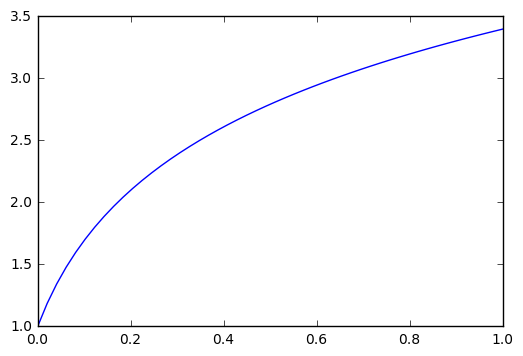

In [1]:
plt.plot(xspan, sol)


# The algorithm we use for almost every problem

1.  The mole balance and design equation
    
    Three basic kinds of reactors: batch, CSTR, PFR/PBR
    A few special kinds: semibatch

2.  Rate law - an algebraic expression for the rate of each reaction

3.  Stoichiometry - determines the species specific net rates, and concentrations
    e.g $C_A = F_A / \nu$.

4.  Combine - to get a fully specified mathematical problem

5.  Evaluate - using fsolve, odeint


## Example

Find the volume required to reach 90% conversion of A for the elementary gas phase reaction

$2A + B \rightarrow C$ which takes place in a CSTR at constant temperature (500 K) and constant pressure (16.4 atm). The feed is equal molar in A and B, and A is fed at 5 mol/s. The rate constant for this reaction is reported to be 10 (L/mol)<sup>2</sup>/s.

R = 0.082 atm L / (mol K)

1.  The mole balance/design equation. We have a CSTR, so we choose: $V = \frac{F_{A0} X}{-r_A}$.

2.  The rate law. The reaction is specified as elementary. That means: $r_A = k C_A^2 C_B$. We use the stoichiometry as the reaction is written. Note we have a gas-phase reaction with changing moles, so we have to compute: $C_A = F_A / \nu$ with $\nu = \nu_0 F_T / F_{T0}$. The total molar flow rates involve all three species.

$F_T = F_A + F_B + F_C$

and 

$F_{T0} + F_{A0} + F_{B0}$

There is no C flowing into this reactor.

1.  Stoichiometry. We want 90% conversion on A, so we renormalize the reaction to be: $A + 1/2 B \rightarrow 1/2 C$. This leads us to these molar flows:

$F_A = F_{A0} - F_{A0} X$

$F_B = F_{B0} - 0.5 * F_{A0} X$

$F_C = F_{C0} + 0.5 * F_{A0} X$

1.  We combine these into a fully formulated problem and then evaluate it.

Let's work this out, nearly from scratch.



In [1]:
# Given data
Fa0 = Fb0 = 5 # mol / s
ya0 = 0.5 # mole fraction of A in the feed
P0 = 16.4  # atm
T0 = 500 # K
R = 0.082 # atm L / mol / K

v0  = Fa0 / Ca0

k = 10 # (L/mol)^2/s
X = 0.9